In [ ]:
# import standard scientific libraries
import os
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as kb
import matplotlib.pyplot as plt

# import ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [ ]:
pd.set_option('max_columns', None)
pd.set_option("display.precision", 8)

dataset = "./"

In [ ]:
train = pd.read_csv( dataset + 'train.csv')
train.shape

(68613, 14)

In [ ]:
test = pd.read_csv(dataset + "test.csv")
test.shape


(17000, 13)

In [ ]:
col = ["functional_groups", "topology"]
for i in col:
    test[i] = test[i].astype("category").cat.codes
test.dtypes

MOFname                                           object
volume [A^3]                                     float64
weight [u]                                       float64
surface_area [m^2/g]                             float64
void_fraction                                    float64
void_volume [cm^3/g]                             float64
functional_groups                                  int16
metal_linker                                       int64
organic_linker1                                    int64
organic_linker2                                    int64
topology                                            int8
CO2/N2_selectivity                               float64
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]    float64
dtype: object

In [ ]:
col = ["functional_groups", "topology"]
for i in col:
    train[i] = train[i].astype("category").cat.codes
train.dtypes

MOFname                                           object
volume [A^3]                                     float64
weight [u]                                       float64
surface_area [m^2/g]                             float64
void_fraction                                    float64
void_volume [cm^3/g]                             float64
functional_groups                                  int16
metal_linker                                       int64
organic_linker1                                    int64
organic_linker2                                    int64
topology                                            int8
CO2/N2_selectivity                               float64
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]    float64
CO2_working_capacity [mL/g]                      float64
dtype: object

In [ ]:
ratio = 0.8
train_size = math.floor(train.shape[0]*0.8)
test_size = train.shape[0] - train_size
print("dataset size:", train.shape[0])
print("train size:", train_size)
print("test size:", test_size)

dataset size: 68613
train size: 54890
test size: 13723


In [ ]:
train = train.iloc[:, [1,2,3,4,5,7,8,9,11,12,13]]
train

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,1116.667429,875.240600,0.00,0.07899,0.0607,3,4,11,22.86416611,6.786041,105.28450172
1,2769.503842,2211.697211,603.61,0.13794,0.1040,10,44,57,33.61678033,7.147286,101.22477418
2,1089.818728,773.687960,788.50,0.14874,0.1262,2,22,24,19.26372569,6.347967,118.98701075
3,2205.198301,1304.638720,1441.53,0.21814,0.2220,9,17,24,25.70137692,6.190085,187.62600450
4,1137.800963,901.736120,0.00,0.07778,0.0591,2,1,22,30.00183795,6.478063,79.21000066
...,...,...,...,...,...,...,...,...,...,...,...
68608,1188.302573,1001.700216,0.00,0.00000,0.0000,3,4,24,24.13177036,NaN,-12.94365213
68609,1506.660363,1493.296496,0.00,0.01108,0.0000,10,42,46,6.07181778,NaN,-12.98558157
68610,2035.532738,1959.518320,0.00,0.00000,0.0000,4,14,22,9.87613400,NaN,-13.18763527
68611,3985.426053,3638.677280,0.00,0.00000,0.0000,4,4,15,5.28505063,inf,15.67269762


In [ ]:
x_train = train.iloc[0:train_size, :-1].astype(np.float32)
y_train = train.iloc[0:train_size, -1].astype(np.float32)
x_test = train.iloc[train_size:train_size+test_size, :-1].astype(np.float32)
y_true = train.iloc[train_size:train_size+test_size, -1].astype(np.float32)
x_train.dtypes

volume [A^3]                                     float32
weight [u]                                       float32
surface_area [m^2/g]                             float32
void_fraction                                    float32
void_volume [cm^3/g]                             float32
metal_linker                                     float32
organic_linker1                                  float32
organic_linker2                                  float32
CO2/N2_selectivity                               float32
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]    float32
dtype: object

In [ ]:
Real_data = train.iloc[54894:66527, -1]
(Real_data)

54894    110.69042852
54895    135.36607092
54896    182.12994591
54897    156.36809982
54898    228.52867157
             ...     
66522     -7.54680455
66523      4.58731219
66524     22.22788735
66525     23.60809236
66526     22.71717423
Name: CO2_working_capacity [mL/g], Length: 11633, dtype: float64

In [ ]:
train_order = pd.read_csv('train.csv')
mof_order = train_order.iloc[train_size:66258,0]
(mof_order)

54890    mof_unit_54891
54891    mof_unit_54892
54892    mof_unit_54893
54893    mof_unit_54894
54894    mof_unit_54895
              ...      
66253    mof_unit_66254
66254    mof_unit_66255
66255    mof_unit_66256
66256    mof_unit_66257
66257    mof_unit_66258
Name: MOFname, Length: 11368, dtype: object

In [ ]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     #test_labels=y_test, 
                     #predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

SyntaxError: invalid syntax (<ipython-input-12-553b6b442824>, line 8)

In [ ]:
x_train.iloc[:,[1]], y_train

(          weight [u]
 0       875.24060059
 1      2211.69726562
 2       773.68798828
 3      1304.63867188
 4       901.73614502
 ...              ...
 54885  1013.21087646
 54886   983.65759277
 54887  2055.45898438
 54888  1967.75036621
 54889  4745.33349609
 
 [54890 rows x 1 columns],
 0        105.28450012
 1        101.22477722
 2        118.98700714
 3        187.62600708
 4         79.20999908
              ...     
 54885     78.39171600
 54886    139.42282104
 54887     77.31030273
 54888     73.08566284
 54889     98.62993622
 Name: CO2_working_capacity [mL/g], Length: 54890, dtype: float32)

ValueError: x and y must be the same size

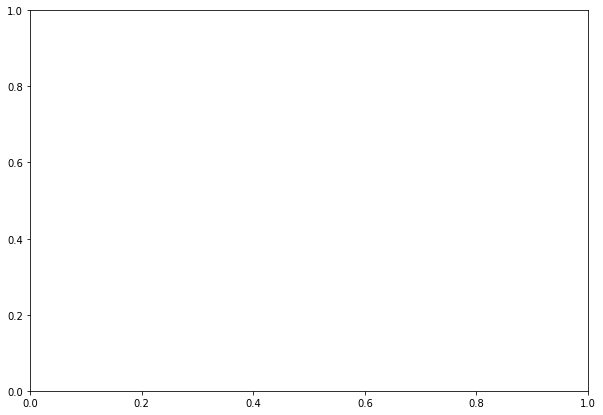

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(x_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

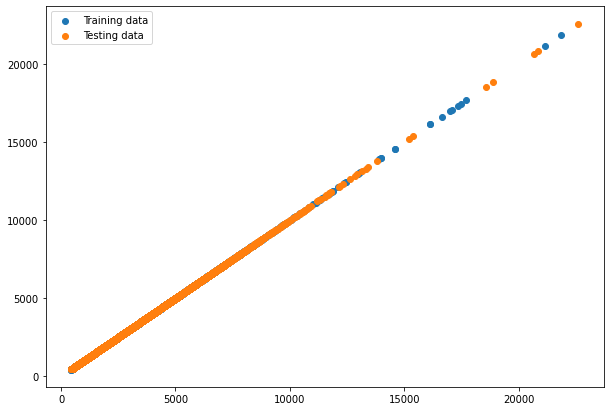

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train.iloc[:, [1]], x_train.iloc[:, [1]], label='Training data')
# Plot test data in green
plt.scatter(x_test.iloc[:, [1]], x_test.iloc[:, [1]], label='Testing data')
# Show the legend
plt.legend();

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model_4 = Sequential()
model_4.add(Dense(12, input_dim=(x_train.shape[1]), activation='relu')) # input
model_4.add(Dense(24, activation='relu')) # hidden 1
model_4.add(Dense(12, activation='relu')) # hidden 2
model_4.add(Dense(1, activation='linear')) # output

In [ ]:
model_4.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model_4.fit(x_train, y_train, epochs=100000,batch_size=64)

Epoch 17046/100000
858/858 [==============================] - 1s 1ms/step - loss: 24.0843 - accuracy: 0.0000e+00
Epoch 17047/100000
858/858 [==============================] - 1s 1ms/step - loss: 24.1462 - accuracy: 0.0000e+00
Epoch 17048/100000
858/858 [==============================] - 1s 1ms/step - loss: 24.1270 - accuracy: 0.0000e+00
Epoch 17049/100000
858/858 [==============================] - 1s 1ms/step - loss: 24.0169 - accuracy: 0.0000e+00
Epoch 17050/100000
858/858 [==============================] - 1s 1ms/step - loss: 24.1626 - accuracy: 0.0000e+00
Epoch 17051/100000
858/858 [==============================] - 1s 1ms/step - loss: 24.0708 - accuracy: 0.0000e+00
Epoch 17052/100000
858/858 [==============================] - 1s 1ms/step - loss: 24.0336 - accuracy: 0.0000e+00
Epoch 17053/100000
858/858 [==============================] - 1s 1ms/step - loss: 23.8778 - accuracy: 0.0000e+00
Epoch 17054/100000
858/858 [==============================] - 1s 1ms/step - loss: 24.0957 - accu

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
x_predict = model_4.predict(x_test.iloc[1:11634])
len(x_predict)

NameError: name 'model_4' is not defined

In [ ]:
result = pd.DataFrame({
    "id": [ str(i) for i in range(1,11634)],
    "CO2_working_capacity [mL/g]": x_predict.T[0]
    })

result.to_csv("result.csv", index=False)

ValueError: arrays must all be same length

In [ ]:
mof_order_pd = pd.DataFrame({
    "id": [ str(i) for i in range(1,11634)]
    })

mof_order_pd.to_csv("mof_order_pd.csv", index=False)

In [ ]:
#len(mof_order_pd)
len(y_true)

13723

In [ ]:
mof_order_pd = pd.read_csv('mof_order_pd.csv')
len(mof_order_pd)

11633

In [ ]:
len(Real_data)

11633

In [ ]:
plt.figure(figsize=(20, 899))

plt.scatter(x_predict, mof_order_pd, label='Predicted Data')

plt.scatter(Real_data, mof_order_pd, label='Real Data')

plt.legend();

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
model_5 = Sequential()
model_5.add(Dense(12, input_dim=(x_train.shape[1]), activation='relu')) # input
model_5.add(Dense(24, activation='relu')) # hidden 1
model_5.add(Dense(12, activation='relu')) # hidden 2
model_5.add(Dense(1, activation='linear')) # output

In [ ]:
model_5.compile(loss='mae', optimizer='Adam', metrics=['accuracy'])
model_5.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
858/858 [==============================] - 4s 3ms/step - loss: 98.1999 - accuracy: 0.0000e+00
Epoch 2/10
858/858 [==============================] - 3s 4ms/step - loss: 97.5444 - accuracy: 0.0000e+00
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 95.9429 - accuracy: 0.0000e+00
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 95.8207 - accuracy: 0.0000e+00
Epoch 5/10
858/858 [==============================] - 3s 4ms/step - loss: 95.4629 - accuracy: 0.0000e+00
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 93.7398 - accuracy: 0.0000e+00
Epoch 7/10
858/858 [==============================] - 3s 3ms/step - loss: 93.5184 - accuracy: 0.0000e+00
Epoch 8/10
858/858 [==============================] - 3s 3ms/step - loss: 92.1163 - accuracy: 0.0000e+00
Epoch 9/10
858/858 [==============================] - 3s 3ms/step - loss: 91.0854 - accuracy: 0.0000e+00
Epoch 10/10
858/858 [==============================] - 

In [ ]:
y_pred = model_4.predict(x_test)
#log_mae = np.log(mean_absolute_error(y_pred, y_true))
#log_mae

In [ ]:
y_pred


array([[106.53906],
       [288.1768 ],
       [164.88594],
       ...,
       [      nan],
       [      nan],
       [      nan]], dtype=float32)

In [ ]:
test_pred = model_4.predict(test.iloc[:, [1,2,3,4,5,7,8,9,11,12]])
test_pred

array([[186.68689 ],
       [ 65.36473 ],
       [ 67.65518 ],
       ...,
       [ 35.7744  ],
       [ 39.636955],
       [ 85.11847 ]], dtype=float32)

In [ ]:
submission = pd.DataFrame({
    "id": [ str(i) for i in range(68614,85614)],
    "CO2_working_capacity [mL/g]": test_pred.T[0]
    })

submission.to_csv("submission.csv", index=False)

In [ ]:
!ls

 mof_order_pd.csv	        TestSubmission05byPhase2.zip
 result.csv		        TestSubmission06byPhase2.zip
 submission.csv		        train.csv
 test.csv		       'Zero -To-Hero-ML.ipynb'
 TestSubmission02byPhase2.zip  'Zero -To-Hero-ML-Phase1-Recov.ipynb'
 TestSubmission03byPhase2.zip   ZTH-Test-2.ipynb
 TestSubmission04byPhase2.zip   ZTH-Test.ipynb


In [ ]:
%%capture
!sudo apt-get update
!sudo apt-get install zip

In [ ]:
!zip TestSubmission07byPhase2.zip submission.csv

  adding: submission.csv (deflated 56%)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=89ff0356-6e0b-40ab-922e-602a46fe5c41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>